# Teleco Customer Churn

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = '/content/Telco-Customer-Churn.csv'
telco_data = pd.read_csv(url)

# Display the first few rows of the dataset
telco_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Basic Structure Exploration

In [ ]:
# Check the data types of each column
print("Data Types:\n", telco_data.dtypes)

# Check for missing values
missing_values = telco_data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Summary statistics for numerical columns
numerical_summary = telco_data.describe()
print("\nNumerical Summary:\n", numerical_summary)

# Summary statistics for categorical columns
categorical_summary = telco_data.describe(include=['O'])
print("\nCategorical Summary:\n", categorical_summary)


Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
 Series([], dtype: int64)

Numerical Summary:
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000 

# Initial Data Visualizations

In [ ]:
from google.colab import output

# Install necessary libraries for D3.js in Colab
!pip install ipywidgets

In [ ]:
from IPython.display import HTML

# Sample function to embed D3.js visualizations in Colab
def create_d3_visualization():
    display_html = '''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .bar {
                fill: steelblue;
            }
        </style>
    </head>
    <body>
    <svg width="600" height="400"></svg>
    <script>
        var data = [30, 86, 168, 281, 303, 365];

        var svg = d3.select("svg"),
            width = +svg.attr("width"),
            height = +svg.attr("height");

        var x = d3.scaleBand().domain(d3.range(data.length)).range([0, width]).padding(0.1),
            y = d3.scaleLinear().domain([0, d3.max(data)]).nice().range([height, 0]);

        var bar = svg.selectAll(".bar")
          .data(data)
          .enter().append("rect")
            .attr("class", "bar")
            .attr("x", function(d, i) { return x(i); })
            .attr("y", function(d) { return y(d); })
            .attr("height", function(d) { return height - y(d); })
            .attr("width", x.bandwidth());
    </script>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to test D3.js integration in Colab
create_d3_visualization()


# More visualization

Data Preparation

In [ ]:
# Prepare data for churn visualization
churn_data = telco_data['Churn'].value_counts().reset_index()
churn_data.columns = ['Churn', 'Count']

# Display the churn data
churn_data

,Churn,Count
0,No,5174
1,Yes,1869


Churn Visualization

In [ ]:
def create_churn_visualization():
    # Get the data for the churn distribution
    churn_values = churn_data['Count'].tolist()
    churn_labels = churn_data['Churn'].tolist()

    display_html = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .bar {{
                fill: steelblue;
            }}
            .label {{
                fill: white;
                font-size: 12px;
                text-anchor: middle;
            }}
        </style>
    </head>
    <body>
    <svg width="600" height="400"></svg>
    <script>
        var data = {churn_values};
        var labels = {churn_labels};

        var svg = d3.select("svg"),
            width = +svg.attr("width"),
            height = +svg.attr("height");

        var x = d3.scaleBand().domain(labels).range([0, width]).padding(0.1),
            y = d3.scaleLinear().domain([0, d3.max(data)]).nice().range([height, 0]);

        var bar = svg.selectAll(".bar")
          .data(data)
          .enter().append("rect")
            .attr("class", "bar")
            .attr("x", function(d, i) {{ return x(labels[i]); }})
            .attr("y", function(d) {{ return y(d); }})
            .attr("height", function(d) {{ return height - y(d); }})
            .attr("width", x.bandwidth());

        svg.selectAll(".label")
          .data(data)
          .enter().append("text")
            .attr("class", "label")
            .attr("x", function(d, i) {{ return x(labels[i]) + x.bandwidth() / 2; }})
            .attr("y", function(d) {{ return y(d) - 5; }})
            .text(function(d) {{ return d; }});
    </script>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the churn distribution visualization
create_churn_visualization()


# Tenure Visualization

In [ ]:
# Prepare the data for tenure visualization
tenure_data = telco_data['tenure'].tolist()

def create_tenure_visualization():
    display_html = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .bar {{
                fill: steelblue;
            }}
        </style>
    </head>
    <body>
    <svg width="600" height="400"></svg>
    <script>
        var data = {tenure_data};

        // Create a histogram with 10 bins
        var svg = d3.select("svg"),
            width = +svg.attr("width"),
            height = +svg.attr("height");

        var x = d3.scaleLinear().domain([0, 72]).range([0, width]);
        var bins = d3.histogram().domain(x.domain()).thresholds(x.ticks(10))(data);

        var y = d3.scaleLinear().domain([0, d3.max(bins, function(d) {{ return d.length; }})]).range([height, 0]);

        var bar = svg.selectAll(".bar")
          .data(bins)
          .enter().append("rect")
            .attr("class", "bar")
            .attr("x", function(d) {{ return x(d.x0); }})
            .attr("y", function(d) {{ return y(d.length); }})
            .attr("width", function(d) {{ return x(d.x1) - x(d.x0) - 1; }})
            .attr("height", function(d) {{ return height - y(d.length); }});

    </script>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the tenure distribution visualization
create_tenure_visualization()


# Monthly Charge Visualization

In [ ]:
# Prepare the data for monthly charges visualization
monthly_charges_data = telco_data['MonthlyCharges'].tolist()

def create_monthly_charges_visualization():
    display_html = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .bar {{
                fill: orange;
            }}
        </style>
    </head>
    <body>
    <svg width="600" height="400"></svg>
    <script>
        var data = {monthly_charges_data};

        // Create a histogram with 10 bins
        var svg = d3.select("svg"),
            width = +svg.attr("width"),
            height = +svg.attr("height");

        var x = d3.scaleLinear().domain([0, 120]).range([0, width]);
        var bins = d3.histogram().domain(x.domain()).thresholds(x.ticks(10))(data);

        var y = d3.scaleLinear().domain([0, d3.max(bins, function(d) {{ return d.length; }})]).range([height, 0]);

        var bar = svg.selectAll(".bar")
          .data(bins)
          .enter().append("rect")
            .attr("class", "bar")
            .attr("x", function(d) {{ return x(d.x0); }})
            .attr("y", function(d) {{ return y(d.length); }})
            .attr("width", function(d) {{ return x(d.x1) - x(d.x0) - 1; }})
            .attr("height", function(d) {{ return height - y(d.length); }});

    </script>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the monthly charges distribution visualization
create_monthly_charges_visualization()


# Churn vs. Tenure and Monthly Charges

Churn vs Tenure

In [ ]:
def create_churn_vs_tenure_visualization():
    display_html = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .bar-yes {{
                fill: steelblue;
            }}
            .bar-no {{
                fill: orange;
            }}
        </style>
    </head>
    <body>
    <svg width="600" height="400"></svg>
    <script>
        var dataYes = {churn_yes_tenure};
        var dataNo = {churn_no_tenure};

        // Create histograms
        var svg = d3.select("svg"),
            width = +svg.attr("width"),
            height = +svg.attr("height");

        var x = d3.scaleLinear().domain([0, 72]).range([0, width]);  // Tenure range
        var binsYes = d3.histogram().domain(x.domain()).thresholds(x.ticks(10))(dataYes);
        var binsNo = d3.histogram().domain(x.domain()).thresholds(x.ticks(10))(dataNo);

        var y = d3.scaleLinear().domain([0, d3.max(binsYes.concat(binsNo), function(d) {{ return d.length; }})]).range([height, 0]);

        // Draw bars for Churn == 'Yes'
        svg.selectAll(".bar-yes")
          .data(binsYes)
          .enter().append("rect")
            .attr("class", "bar-yes")
            .attr("x", function(d) {{ return x(d.x0) - 10; }})  // Slight left shift for 'Yes'
            .attr("y", function(d) {{ return y(d.length); }})
            .attr("width", function(d) {{ return (x(d.x1) - x(d.x0)) / 2; }})  // Half the normal width
            .attr("height", function(d) {{ return height - y(d.length); }});

        // Draw bars for Churn == 'No'
        svg.selectAll(".bar-no")
          .data(binsNo)
          .enter().append("rect")
            .attr("class", "bar-no")
            .attr("x", function(d) {{ return x(d.x0) + 10; }})  // Slight right shift for 'No'
            .attr("y", function(d) {{ return y(d.length); }})
            .attr("width", function(d) {{ return (x(d.x1) - x(d.x0)) / 2; }})  // Half the normal width
            .attr("height", function(d) {{ return height - y(d.length); }});

        // Add a legend
        var legend = svg.append("g")
            .attr("transform", "translate(500, 20)");  // Position the legend

        // Add legend entry for Churn == Yes
        legend.append("rect")
            .attr("x", 0)
            .attr("y", 0)
            .attr("width", 15)
            .attr("height", 15)
            .attr("fill", "steelblue");

        legend.append("text")
            .attr("x", 20)
            .attr("y", 12)
            .text("Churn == Yes");

        // Add legend entry for Churn == No
        legend.append("rect")
            .attr("x", 0)
            .attr("y", 20)
            .attr("width", 15)
            .attr("height", 15)
            .attr("fill", "orange");

        legend.append("text")
            .attr("x", 20)
            .attr("y", 32)
            .text("Churn == No");

    </script>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the Churn vs. Tenure visualization with a legend
create_churn_vs_tenure_visualization()


Churn vs Monthly Charges

In [ ]:
def create_churn_vs_monthly_charges_visualization():
    display_html = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .bar-yes {{
                fill: steelblue;
            }}
            .bar-no {{
                fill: orange;
            }}
        </style>
    </head>
    <body>
    <svg width="600" height="400"></svg>
    <script>
        var dataYes = {churn_yes_charges};
        var dataNo = {churn_no_charges};

        // Create histograms
        var svg = d3.select("svg"),
            width = +svg.attr("width"),
            height = +svg.attr("height");

        var x = d3.scaleLinear().domain([0, 120]).range([0, width]);  // MonthlyCharges range
        var binsYes = d3.histogram().domain(x.domain()).thresholds(x.ticks(10))(dataYes);
        var binsNo = d3.histogram().domain(x.domain()).thresholds(x.ticks(10))(dataNo);

        var y = d3.scaleLinear().domain([0, d3.max(binsYes.concat(binsNo), function(d) {{ return d.length; }})]).range([height, 0]);

        // Draw bars for Churn == 'Yes'
        svg.selectAll(".bar-yes")
          .data(binsYes)
          .enter().append("rect")
            .attr("class", "bar-yes")
            .attr("x", function(d) {{ return x(d.x0) - 10; }})  // Slight left shift for 'Yes'
            .attr("y", function(d) {{ return y(d.length); }})
            .attr("width", function(d) {{ return (x(d.x1) - x(d.x0)) / 2; }})  // Half the normal width
            .attr("height", function(d) {{ return height - y(d.length); }});

        // Draw bars for Churn == 'No'
        svg.selectAll(".bar-no")
          .data(binsNo)
          .enter().append("rect")
            .attr("class", "bar-no")
            .attr("x", function(d) {{ return x(d.x0) + 10; }})  // Slight right shift for 'No'
            .attr("y", function(d) {{ return y(d.length); }})
            .attr("width", function(d) {{ return (x(d.x1) - x(d.x0)) / 2; }})  // Half the normal width
            .attr("height", function(d) {{ return height - y(d.length); }});

        // Add a legend
        var legend = svg.append("g")
            .attr("transform", "translate(500, 20)");  // Position the legend

        // Add legend entry for Churn == Yes
        legend.append("rect")
            .attr("x", 0)
            .attr("y", 0)
            .attr("width", 15)
            .attr("height", 15)
            .attr("fill", "steelblue");

        legend.append("text")
            .attr("x", 20)
            .attr("y", 12)
            .text("Churn == Yes");

        // Add legend entry for Churn == No
        legend.append("rect")
            .attr("x", 0)
            .attr("y", 20)
            .attr("width", 15)
            .attr("height", 15)
            .attr("fill", "orange");

        legend.append("text")
            .attr("x", 20)
            .attr("y", 32)
            .text("Churn == No");

    </script>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the Churn vs. Monthly Charges visualization with a legend
create_churn_vs_monthly_charges_visualization()


# Creating a correlation Heatmap

In [ ]:
# Convert TotalCharges to numeric, setting errors='coerce' will convert non-numeric values to NaN
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

# Check if there are any missing values after conversion
missing_total_charges = telco_data['TotalCharges'].isnull().sum()
print(f"Number of missing values in TotalCharges after conversion: {missing_total_charges}")

# Optionally, drop rows with missing TotalCharges values
telco_data_clean = telco_data.dropna(subset=['TotalCharges'])


Number of missing values in TotalCharges after conversion: 11


In [ ]:
# Calculate the correlation matrix for numerical variables
corr_matrix = telco_data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Display the correlation matrix
corr_matrix


,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


In [ ]:
import numpy as np

# Convert correlation matrix to a format suitable for D3.js
corr_values = corr_matrix.values.tolist()
features = corr_matrix.columns.tolist()

def create_correlation_heatmap():
    display_html = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .axis text {{
                font: 10px sans-serif;
            }}
            .square {{
                stroke: #E6E6E6;
                stroke-width: 0.5px;
            }}
        </style>
    </head>
    <body>
    <svg width="400" height="400"></svg>
    <script>
        var corrMatrix = {corr_values};
        var features = {features};

        var margin = {{ top: 50, right: 0, bottom: 100, left: 100 }},
            width = 400 - margin.left - margin.right,
            height = 400 - margin.top - margin.bottom;

        var svg = d3.select("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
          .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        var x = d3.scaleBand()
            .range([0, width])
            .domain(features)
            .padding(0.05);

        var y = d3.scaleBand()
            .range([height, 0])
            .domain(features)
            .padding(0.05);

        var colorScale = d3.scaleSequential(d3.interpolateRdBu)
            .domain([-1, 1]);

        svg.selectAll(".square")
            .data(corrMatrix.flatMap(function(row, i) {{
                return row.map(function(value, j) {{
                    return {{ x: features[i], y: features[j], value: value }};
                }});
            }}))
          .enter().append("rect")
            .attr("x", function(d) {{ return x(d.x); }})
            .attr("y", function(d) {{ return y(d.y); }})
            .attr("width", x.bandwidth())
            .attr("height", y.bandwidth())
            .attr("class", "square")
            .style("fill", function(d) {{ return colorScale(d.value); }});

        svg.append("g")
            .call(d3.axisBottom(x))
            .selectAll("text")
            .attr("dx", "-0.8em")
            .attr("dy", ".15em")
            .attr("transform", "rotate(-65)")
            .style("text-anchor", "end");

        svg.append("g")
            .call(d3.axisLeft(y));
    </script>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the Correlation Heatmap
create_correlation_heatmap()


# Scatter Plot Visual

In [ ]:
import json

# Convert the relevant columns of telco_data_clean to a list of dictionaries (JSON format)
data_json = telco_data_clean[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].to_dict(orient='records')

def create_interactive_scatter_plot_matrix_with_labels():
    display_html = '''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .axis text {
                font: 10px sans-serif;
            }
            .point {
                stroke: #E6E6E6;
                stroke-width: 1.5px;
            }
            .tooltip {
                position: absolute;
                text-align: center;
                width: 80px;
                height: auto;
                padding: 5px;
                background: lightsteelblue;
                border: 0;
                border-radius: 5px;
                pointer-events: none;
                font-size: 12px;
            }
            .title {
                font-size: 16px;
                font-weight: bold;
                text-align: center;
            }
            .description {
                font-size: 14px;
                text-align: center;
                margin-top: 20px;
            }
        </style>
    </head>
    <body>
    <div class="title">Scatter Plot Matrix: Numerical Features of Telco Customer Churn</div>
    <svg width="700" height="700"></svg>
    <script>
        var data = ''' + json.dumps(data_json) + ''';

        var dimensions = ['tenure', 'MonthlyCharges', 'TotalCharges'];
        var color = d3.scaleOrdinal().domain([0, 1]).range(['steelblue', 'orange']);

        var svg = d3.select("svg"),
            width = +svg.attr("width"),
            height = +svg.attr("height"),
            padding = 80;

        var size = (width - 2 * padding) / dimensions.length;

        var x = {};
        var y = {};

        // Create scales for each dimension
        dimensions.forEach(function(d) {
            x[d] = d3.scaleLinear()
                .domain(d3.extent(data, function(row) { return row[d]; }))
                .range([padding, padding + size]);
            y[d] = d3.scaleLinear()
                .domain(d3.extent(data, function(row) { return row[d]; }))
                .range([padding + size, padding]);
        });

        // Add titles to the diagonal
        dimensions.forEach(function(d, i) {
            svg.append("text")
                .attr("x", (i * size) + (padding / 2))
                .attr("y", padding - 15)
                .style("text-anchor", "middle")
                .text(d);
        });

        // Create the scatter plot matrix
        dimensions.forEach(function(d1, i) {
            dimensions.forEach(function(d2, j) {
                var cell = svg.append("g")
                    .attr("transform", "translate(" + (i * size) + "," + (j * size) + ")");

                // Create background rectangles for each subplot
                cell.append("rect")
                    .attr("x", padding)
                    .attr("y", padding)
                    .attr("width", size)
                    .attr("height", size)
                    .style("fill", "none")
                    .style("stroke", "#ccc");

                // Add points (scatter plot)
                cell.selectAll(".point")
                    .data(data)
                    .enter().append("circle")
                    .attr("class", "point")
                    .attr("cx", function(d) { return x[d1](d[d1]); })
                    .attr("cy", function(d) { return y[d2](d[d2]); })
                    .attr("r", 3)
                    .style("fill", function(d) { return color(d.Churn); });

                // Add axes to each subplot
                if (j === dimensions.length - 1) {
                    cell.append("g")
                        .attr("transform", "translate(0," + (padding + size) + ")")
                        .call(d3.axisBottom(x[d1]).ticks(5));
                }
                if (i === 0) {
                    cell.append("g")
                        .attr("transform", "translate(" + padding + ",0)")
                        .call(d3.axisLeft(y[d2]).ticks(5));
                }
            });
        });

    </script>
    <div class="description">
        This scatter plot matrix visualizes the relationships between numerical features like tenure, monthly charges, and total charges, with points colored by churn status (orange for churned customers, blue for non-churned).
    </div>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the scatter plot matrix with labels and description
create_interactive_scatter_plot_matrix_with_labels()

# Stacked Bar Chart

In [ ]:
import json

# Prepare the data for the stacked bar chart
contract_churn = pd.crosstab(telco_data_clean['Contract'], telco_data_clean['Churn']).reset_index().to_dict(orient='records')

def create_stacked_bar_chart():
    display_html = '''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .bar {
                fill: steelblue;
            }
            .tooltip {
                position: absolute;
                text-align: center;
                width: 80px;
                height: auto;
                padding: 5px;
                background: lightsteelblue;
                border: 0;
                border-radius: 5px;
                pointer-events: none;
                font-size: 12px;
            }
            .title {
                font-size: 16px;
                font-weight: bold;
                text-align: center;
            }
            .description {
                font-size: 14px;
                text-align: center;
                margin-top: 20px;
            }
        </style>
    </head>
    <body>
    <div class="title">Stacked Bar Chart: Churn by Contract Type</div>
    <svg width="600" height="400"></svg>
    <script>
        var data = ''' + json.dumps(contract_churn) + ''';

        var margin = { top: 20, right: 30, bottom: 50, left: 40 },
            width = 600 - margin.left - margin.right,
            height = 400 - margin.top - margin.bottom;

        var svg = d3.select("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
          .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        var x = d3.scaleBand()
            .range([0, width])
            .domain(data.map(function(d) { return d.Contract; }))
            .padding(0.2);

        var y = d3.scaleLinear()
            .range([height, 0])
            .domain([0, d3.max(data, function(d) { return d.Yes + d.No; })]);

        svg.append("g")
            .attr("transform", "translate(0," + height + ")")
            .call(d3.axisBottom(x));

        svg.append("g")
            .call(d3.axisLeft(y));

        var tooltip = d3.select("body").append("div")
            .attr("class", "tooltip")
            .style("opacity", 0);

        // Draw bars for "Yes" (churned customers)
        svg.selectAll(".bar-yes")
            .data(data)
            .enter().append("rect")
            .attr("class", "bar-yes")
            .attr("x", function(d) { return x(d.Contract); })
            .attr("y", function(d) { return y(d.Yes); })
            .attr("width", x.bandwidth())
            .attr("height", function(d) { return height - y(d.Yes); })
            .attr("fill", "orange")
            .on("mouseover", function(event, d) {
                tooltip.transition().duration(200).style("opacity", .9);
                tooltip.html("Churned: " + d.Yes + "<br>Non-Churned: " + d.No)
                    .style("left", (event.pageX + 5) + "px")
                    .style("top", (event.pageY - 28) + "px");
            })
            .on("mouseout", function(d) {
                tooltip.transition().duration(500).style("opacity", 0);
            });

        // Draw bars for "No" (non-churned customers)
        svg.selectAll(".bar-no")
            .data(data)
            .enter().append("rect")
            .attr("class", "bar-no")
            .attr("x", function(d) { return x(d.Contract); })
            .attr("y", function(d) { return y(d.No + d.Yes); })  // Stack on top of the "Yes" bar
            .attr("width", x.bandwidth())
            .attr("height", function(d) { return height - y(d.No); })
            .attr("fill", "steelblue");

    </script>
    <div class="description">
        This stacked bar chart visualizes how different contract types relate to churn. The orange bars represent churned customers, while the blue bars represent non-churned customers.
    </div>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the stacked bar chart
create_stacked_bar_chart()


 # Donut Chart for InternetService with Churn Breakdown

In [ ]:
import json

# Prepare data by calculating the proportions of churned and non-churned customers
churn_data = telco_data_clean['Churn'].value_counts().reset_index()
churn_data.columns = ['Churn', 'Count']

# Convert the data to a list of dictionaries for D3.js
churn_dict = churn_data.to_dict(orient='records')

def create_correct_donut_chart():
    display_html = '''
    <!DOCTYPE html>
    <html>
    <head>
        <script src="https://d3js.org/d3.v6.min.js"></script>
        <style>
            .tooltip {
                position: absolute;
                text-align: center;
                width: 120px;
                height: auto;
                padding: 5px;
                background: lightsteelblue;
                border: 0;
                border-radius: 5px;
                pointer-events: none;
                font-size: 12px;
            }
            .title {
                font-size: 16px;
                font-weight: bold;
                text-align: center;
            }
            .description {
                font-size: 14px;
                text-align: center;
                margin-top: 20px;
            }
            .legend {
                font-size: 12px;
                font-family: Arial, sans-serif;
            }
            .legend rect {
                stroke-width: 2;
                stroke: black;
            }
        </style>
    </head>
    <body>
    <div class="title">Corrected Donut Chart: Churn vs. Non-Churn</div>
    <svg width="600" height="400"></svg>
    <script>
        var data = ''' + json.dumps(churn_dict) + ''';

        var width = 600,
            height = 400,
            radius = Math.min(width, height) / 2 - 50;

        var svg = d3.select("svg")
            .attr("width", width)
            .attr("height", height)
          .append("g")
            .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

        var color = d3.scaleOrdinal().domain(["Yes", "No"]).range(["orange", "steelblue"]);

        var pie = d3.pie()
            .value(function(d) { return d.Count; })  // Use the count of churned vs. non-churned customers
            .sort(null);

        var arc = d3.arc()
            .innerRadius(100)  // Donut chart inner radius
            .outerRadius(radius);

        var tooltip = d3.select("body").append("div")
            .attr("class", "tooltip")
            .style("opacity", 0);

        // Draw the donut segments for churned and non-churned customers
        var arcs = svg.selectAll(".arc")
            .data(pie(data))
            .enter().append("g")
            .attr("class", "arc");

        arcs.append("path")
            .attr("d", arc)
            .attr("fill", function(d) { return color(d.data.Churn); })  // Assign correct color
            .on("mouseover", function(event, d) {
                tooltip.transition().duration(200).style("opacity", .9);
                tooltip.html(d.data.Churn + "<br>Count: " + d.data.Count)
                    .style("left", (event.pageX + 5) + "px")
                    .style("top", (event.pageY - 28) + "px");
            })
            .on("mouseout", function(d) {
                tooltip.transition().duration(500).style("opacity", 0);
            });

        // Add percentage labels to each segment
        arcs.append("text")
            .attr("transform", function(d) { return "translate(" + arc.centroid(d) + ")"; })
            .attr("dy", "0.35em")
            .style("text-anchor", "middle")
            .text(function(d) {
                var percentage = (d.data.Count / d3.sum(data, function(d) { return d.Count; })) * 100;
                return percentage.toFixed(1) + "%";
            });

        // Add a legend
        var legend = svg.append("g")
            .attr("class", "legend")
            .attr("transform", "translate(" + (width / 2 - 150) + "," + (height / 2 - 170) + ")");

        var legendItems = legend.selectAll(".legend-item")
            .data(["Yes", "No"])
            .enter().append("g")
            .attr("class", "legend-item")
            .attr("transform", function(d, i) { return "translate(0," + i * 20 + ")"; });

        legendItems.append("rect")
            .attr("x", 0)
            .attr("y", 0)
            .attr("width", 18)
            .attr("height", 18)
            .attr("fill", function(d) { return color(d); });

        legendItems.append("text")
            .attr("x", 24)
            .attr("y", 9)
            .attr("dy", ".35em")
            .text(function(d) { return d === "Yes" ? "Churned" : "Non-Churned"; });

    </script>
    <div class="description">
        This donut chart shows the correct distribution of churned and non-churned customers. The orange section represents churned customers, and the blue section represents non-churned customers.
    </div>
    </body>
    </html>
    '''
    return HTML(display_html)

# Call the function to create the corrected donut chart
create_correct_donut_chart()


# Customer Tenure Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

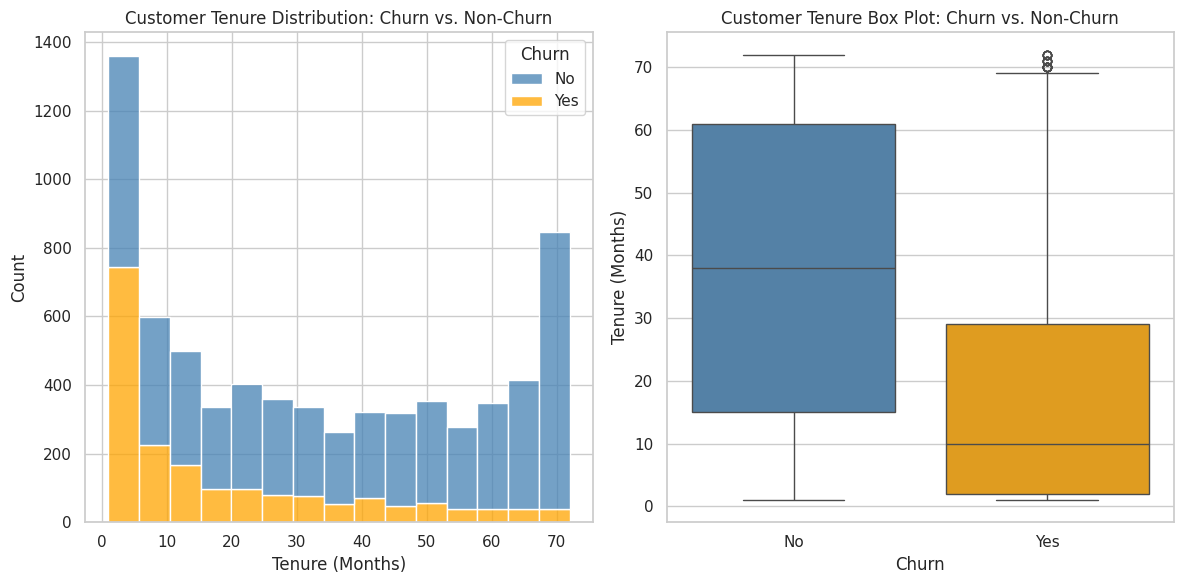

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure for histograms and box plots
plt.figure(figsize=(12, 6))

# Plot the histogram for tenure
plt.subplot(1, 2, 1)
sns.histplot(data=telco_data_clean, x="tenure", hue="Churn", multiple="stack", palette=["steelblue", "orange"])
plt.title('Customer Tenure Distribution: Churn vs. Non-Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')

# Plot the box plot for tenure
plt.subplot(1, 2, 2)
sns.boxplot(data=telco_data_clean, x="Churn", y="tenure", palette=["steelblue", "orange"])
plt.title('Customer Tenure Box Plot: Churn vs. Non-Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')

# Display the plots
plt.tight_layout()
plt.show()


<ipython-input-42-dec0e5a735a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=telco_data_clean, x='Churn', y='tenure', palette=["steelblue", "orange"])
<ipython-input-42-dec0e5a735a1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=telco_data_clean, x='Churn', y='MonthlyCharges', palette=["steelblue", "orange"])


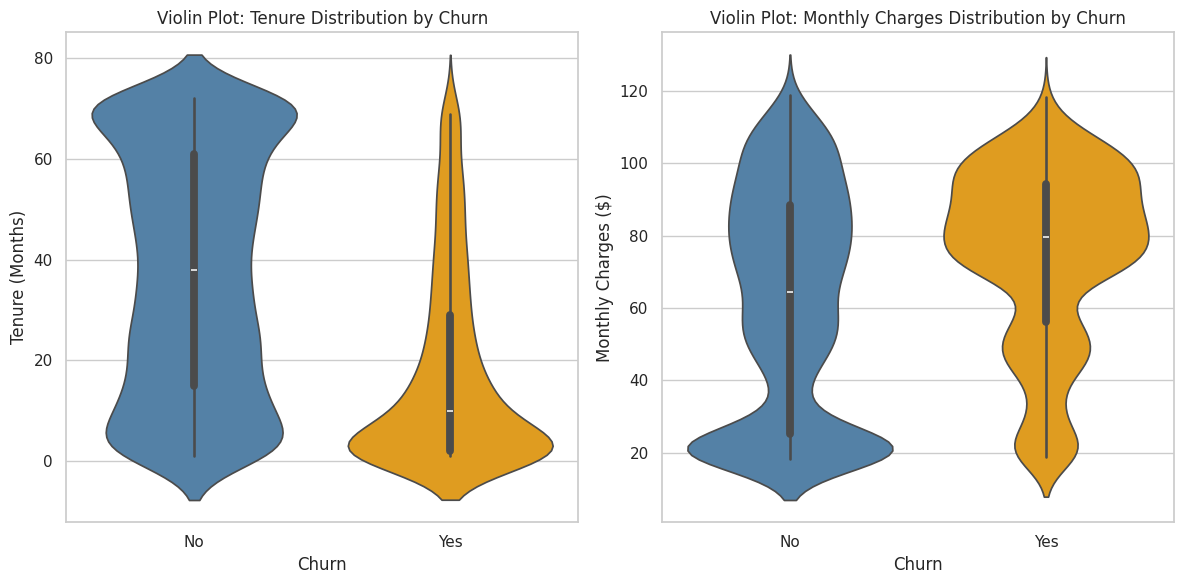

In [ ]:
# Create a violin plot for Tenure and MonthlyCharges vs Churn
plt.figure(figsize=(12, 6))

# Plot for Tenure
plt.subplot(1, 2, 1)
sns.violinplot(data=telco_data_clean, x='Churn', y='tenure', palette=["steelblue", "orange"])
plt.title('Violin Plot: Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')

# Plot for Monthly Charges
plt.subplot(1, 2, 2)
sns.violinplot(data=telco_data_clean, x='Churn', y='MonthlyCharges', palette=["steelblue", "orange"])
plt.title('Violin Plot: Monthly Charges Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Calculate churn rate
churn_rate = telco_data_clean['Churn'].value_counts(normalize=True)['Yes'] * 100

# Create a gauge chart for churn rate
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = churn_rate,
    delta = {'reference': 50},  # Reference value (midpoint)
    gauge = {
        'axis': {'range': [None, 100]},
        'steps': [
            {'range': [0, 25], 'color': "lightgreen"},
            {'range': [25, 50], 'color': "yellow"},
            {'range': [50, 75], 'color': "orange"},
            {'range': [75, 100], 'color': "red"}],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': churn_rate}
    },
    title = {'text': "Churn Probability (%)"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
import plotly.express as px

# Example stages in a customer journey (sign-ups, subscriptions, retention, churn)
stages = ['Sign-ups', 'Subscriptions', 'Active Users', 'Retention', 'Churn']
values = [10000, 7500, 6000, 3000, 1500]  # Example values representing the drop-off at each stage

# Create a funnel chart using Plotly
fig = px.funnel(
    x=values,
    y=stages,
    title="Customer Lifecycle Funnel (Churn Included)",
    labels={'x': 'Number of Customers', 'y': 'Stages'},
)

fig.update_layout(title_x=0.5)
fig.show()
